# **Imports**

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import os
import joblib

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# measure time for ML HyperParams search
import time
from datetime import date

# ML models and utils
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data_dir = os.getcwd() + "/data"
file_name = "stocks_indices_macros_df.parquet"

df = pd.read_parquet(os.path.join(data_dir, file_name))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618840 entries, 0 to 4862
Columns: 231 entries, Open to IRLTLT01JPM156N
dtypes: datetime64[ns](3), float64(156), int32(65), int64(5), object(2)
memory usage: 941.9+ MB


In [3]:
# growth indicators (but not future growth)
GROWTH = [g for g in df.keys() if (g.find('growth_')==0)&(g.find('future')<0)]
GROWTH
     

['growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_365d',
 'growth_^GSPC_1d',
 'growth_^GSPC_3d',
 'growth_^GSPC_7d',
 'growth_^GSPC_30d',
 'growth_^GSPC_90d',
 'growth_^GSPC_365d',
 'growth_^DJI_1d',
 'growth_^DJI_3d',
 'growth_^DJI_7d',
 'growth_^DJI_30d',
 'growth_^DJI_90d',
 'growth_^DJI_365d',
 'growth_^STOXX_1d',
 'growth_^STOXX_3d',
 'growth_^STOXX_7d',
 'growth_^STOXX_30d',
 'growth_^STOXX_90d',
 'growth_^STOXX_365d',
 'growth_^GDAXI_1d',
 'growth_^GDAXI_3d',
 'growth_^GDAXI_7d',
 'growth_^GDAXI_30d',
 'growth_^GDAXI_90d',
 'growth_^GDAXI_365d',
 'growth_^FTSE_1d',
 'growth_^FTSE_3d',
 'growth_^FTSE_7d',
 'growth_^FTSE_30d',
 'growth_^FTSE_90d',
 'growth_^FTSE_365d',
 'growth_^N225_1d',
 'growth_^N225_3d',
 'growth_^N225_7d',
 'growth_^N225_30d',
 'growth_^N225_90d',
 'growth_^N225_365d',
 'growth_GC=F_1d',
 'growth_GC=F_3d',
 'growth_GC=F_7d',
 'growth_GC=F_30d',
 'growth_GC=F_90d',
 'growth_GC=F_365d',
 'growth_HG=F_1d',
 'growth_HG=F_3d',
 'grow

In [4]:
# leaving only Volume ==> generate ln(Volume)
OHLCV = ['Open','High','Low','Close','Close_x','Volume']

In [5]:
CATEGORICAL = ['Month', 'Weekday', 'Ticker', 'ticker_type']

In [7]:
# 2% median growth
df.growth_future_30d.describe()

count    615480.000000
mean          1.019894
std           0.114126
min           0.177273
25%           0.962734
50%           1.017893
75%           1.073361
max           3.993296
Name: growth_future_30d, dtype: float64

In [8]:
df.columns.to_list()

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'ticker_type',
 'Ticker',
 'Year',
 'Month_x',
 'Weekday',
 'Date',
 'growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_365d',
 'growth_future_30d',
 'SMA10',
 'SMA20',
 'growing_moving_average',
 'high_minus_low_relative',
 'volatility',
 'is_positive_growth_30d_future',
 'Capital Gains',
 'index_x',
 'adx',
 'adxr',
 'apo',
 'aroon_1',
 'aroon_2',
 'aroonosc',
 'bop',
 'cci',
 'cmo',
 'dx',
 'macd',
 'macdsignal',
 'macdhist',
 'macd_ext',
 'macdsignal_ext',
 'macdhist_ext',
 'macd_fix',
 'macdsignal_fix',
 'macdhist_fix',
 'mfi',
 'minus_di',
 'mom',
 'plus_di',
 'dm',
 'ppo',
 'roc',
 'rocp',
 'rocr',
 'rocr100',
 'rsi',
 'slowk',
 'slowd',
 'fastk',
 'fastd',
 'fastk_rsi',
 'fastd_rsi',
 'trix',
 'ultosc',
 'willr',
 'index_y',
 'ad',
 'adosc',
 'obv',
 'atr',
 'natr',
 'ht_dcperiod',
 'ht_dcphase',
 'ht_phasor_inphase',
 'ht_phasor_quadrature',
 'ht_sine_sine',
 'ht_sine_le

In [6]:
df = df.rename(columns = {'Month_x': 'Month'})
df = df.drop('Month_y', axis=1)
df.columns.to_list()

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'ticker_type',
 'Ticker',
 'Year',
 'Month',
 'Weekday',
 'Date',
 'growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_365d',
 'growth_future_30d',
 'SMA10',
 'SMA20',
 'growing_moving_average',
 'high_minus_low_relative',
 'volatility',
 'is_positive_growth_30d_future',
 'Capital Gains',
 'index_x',
 'adx',
 'adxr',
 'apo',
 'aroon_1',
 'aroon_2',
 'aroonosc',
 'bop',
 'cci',
 'cmo',
 'dx',
 'macd',
 'macdsignal',
 'macdhist',
 'macd_ext',
 'macdsignal_ext',
 'macdhist_ext',
 'macd_fix',
 'macdsignal_fix',
 'macdhist_fix',
 'mfi',
 'minus_di',
 'mom',
 'plus_di',
 'dm',
 'ppo',
 'roc',
 'rocp',
 'rocr',
 'rocr100',
 'rsi',
 'slowk',
 'slowd',
 'fastk',
 'fastd',
 'fastk_rsi',
 'fastd_rsi',
 'trix',
 'ultosc',
 'willr',
 'index_y',
 'ad',
 'adosc',
 'obv',
 'atr',
 'natr',
 'ht_dcperiod',
 'ht_dcphase',
 'ht_phasor_inphase',
 'ht_phasor_quadrature',
 'ht_sine_sine',
 'ht_sine_lead

In [10]:
# 58% of data records have positive future growth>0
df.is_positive_growth_30d_future.mean()

np.float64(0.5871065218796457)

In [11]:
# moving to strong growth (54% -> ~ 32%):
df.growth_future_30d.quantile(0.68)

np.float64(1.055644063115233)

In [7]:

TO_PREDICT = [g for g in df.keys() if (g.find('future')>=0)]
TO_PREDICT

['growth_future_30d', 'is_positive_growth_30d_future']

In [8]:
# MAIN GOAL HERE IS TO MAKE SURE THAT 'OTHER' list is empty - we should categorize all feautures
# dropping some features - artifacts from joins, CATEGORICAL (to be converted to dummies), OHLCV
# 'index_x', 'index_y', 'index','Adj Close_y'
TO_DROP = ['Year','Date', 'Quarter', 'index', 'index_x', 'index_y', 'Close_y', 'Capital Gains'] + CATEGORICAL + OHLCV
TO_DROP

['Year',
 'Date',
 'Quarter',
 'index',
 'index_x',
 'index_y',
 'Close_y',
 'Capital Gains',
 'Month',
 'Weekday',
 'Ticker',
 'ticker_type',
 'Open',
 'High',
 'Low',
 'Close',
 'Close_x',
 'Volume']

In [9]:
# let's define on more custom numerical features
# Add a small constant to avoid log(0)
df['ln_volume'] = df.Volume.apply(lambda x: np.log(x+ 1e-6))

In [10]:
# define additional columns (DUMMIES) on Dividends or Stock Splits
df['is_div_payout'] = (df.Dividends>0).astype(int)
df['is_stock_split'] = (df['Stock Splits']>0).astype(int)
     

In [11]:
# manually defined features
# 'Dividends' and 'Stock Splits' - absolute values of Divs and Splits.
# is_stock_split, is_div_payout - dummies on the dates when Divs and Splits are >0
CUSTOM_NUMERICAL = ['SMA10', 'SMA20', 'growing_moving_average', 'high_minus_low_relative','volatility', 'ln_volume', 'is_div_payout', 'is_stock_split', 'Dividends', 'Stock Splits']
     

In [12]:
# All Supported Ta-lib indicators: https://github.com/TA-Lib/ta-lib-python/blob/master/docs/funcs.md

TECHNICAL_INDICATORS = ['adx', 'adxr', 'apo', 'aroon_1','aroon_2', 'aroonosc',
 'bop', 'cci', 'cmo','dx', 'macd', 'macdsignal', 'macdhist', 'macd_ext',
 'macdsignal_ext', 'macdhist_ext', 'macd_fix', 'macdsignal_fix',
 'macdhist_fix', 'mfi', 'minus_di', 'mom', 'plus_di', 'dm', 'ppo',
 'roc', 'rocp', 'rocr', 'rocr100', 'rsi', 'slowk', 'slowd', 'fastk',
 'fastd', 'fastk_rsi', 'fastd_rsi', 'trix', 'ultosc', 'willr',
 'ad', 'adosc', 'obv', 'atr', 'natr', 'ht_dcperiod', 'ht_dcphase',
 'ht_phasor_inphase', 'ht_phasor_quadrature', 'ht_sine_sine', 'ht_sine_leadsine',
 'ht_trendmod', 'avgprice', 'medprice', 'typprice', 'wclprice']
     


In [13]:
TECHNICAL_PATTERNS = [g for g in df.keys() if g.find('cdl')>=0]
print(f'Technical patterns count = {len(TECHNICAL_PATTERNS)}, examples = {TECHNICAL_PATTERNS[0:5]}')
     

Technical patterns count = 61, examples = ['cdl2crows', 'cdl3blackrows', 'cdl3inside', 'cdl3linestrike', 'cdl3outside']


In [14]:
MACRO = ['DGS1', 'DGS5', 'DGS10', 'gdppot_us_yoy', 'gdppot_us_qoq',
        'cpi_core_yoy', 'cpi_core_mom', 'FEDFUNDS', 'CSUSHPISA',
       'IRLTLT01DEM156N', 'IRLTLT01GBM156N', 'IRLTLT01JPM156N', '^VIX_Close']
Currencies = ["EURUSD=X_Close", "GBPUSD=X_Close", "JPY=X_Close", "CNY=X_Close"]

In [15]:
NUMERICAL = GROWTH + TECHNICAL_INDICATORS + TECHNICAL_PATTERNS + CUSTOM_NUMERICAL + MACRO + Currencies

In [16]:
# CHECK: NO OTHER INDICATORS LEFT
OTHER = [k for k in df.keys() if k not in OHLCV + CATEGORICAL + NUMERICAL + TO_DROP + TO_PREDICT]
OTHER

[]

In [22]:
df.Ticker.nunique()

112

In [23]:
# Non truncated stats
# tickers, min-max date, count of daily observations
df.groupby(['Ticker'])['Date'].agg(['min','max','count'])

,min,max,count
Ticker,,,
AAPL,2000-01-03,2025-08-26,6451
ABBV,2013-01-02,2025-08-26,3182
ABT,2000-01-03,2025-08-26,6451
ACN,2001-07-19,2025-08-26,6062
ADBE,2000-01-03,2025-08-26,6451
...,...,...,...
WEC,2000-01-03,2025-08-26,6451
WELL,2000-01-03,2025-08-26,6451
WFC,2000-01-03,2025-08-26,6451


# **Dummies**

In [17]:
# dummy variables can't be generated from Date and numeric variables ==> convert to STRING (to define groups for Dummies)
# df.loc[:,'Month'] = df['Date'].dt.month_name().astype('string')
# df.loc[:,'Weekday'] = df['Date'].dt.day_name().astype('string')
df['Month'] = df['Date'].dt.month_name().astype('string')
df['Weekday'] = df['Date'].dt.day_name().astype('string')     

In [19]:
# what are the categorical features?
# SHOULD we remove Ticker from CATEGORICAL? To generalize it even more?
CATEGORICAL
     

['Month', 'Weekday', 'Ticker', 'ticker_type']

In [18]:
# Generate dummy variables (no need for bool, let's have int32 instead)
dummy_variables = pd.get_dummies(df[CATEGORICAL], dtype='int32')
     

In [27]:
dummy_variables.keys()

Index(['Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November',
       ...
       'Ticker_VOYA', 'Ticker_VZ', 'Ticker_WEC', 'Ticker_WELL', 'Ticker_WFC',
       'Ticker_WMT', 'Ticker_XOM', 'ticker_type_biggest_company',
       'ticker_type_commodity_fund', 'ticker_type_tariff'],
      dtype='object', length=132)

In [19]:
# get dummies names in a list
DUMMIES = dummy_variables.keys().to_list()
DUMMIES

['Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September',
 'Weekday_Friday',
 'Weekday_Monday',
 'Weekday_Thursday',
 'Weekday_Tuesday',
 'Weekday_Wednesday',
 'Ticker_AAPL',
 'Ticker_ABBV',
 'Ticker_ABT',
 'Ticker_ACN',
 'Ticker_ADBE',
 'Ticker_AMD',
 'Ticker_AMGN',
 'Ticker_AMZN',
 'Ticker_ANET',
 'Ticker_APP',
 'Ticker_ARM',
 'Ticker_ASML',
 'Ticker_AVGO',
 'Ticker_AXP',
 'Ticker_AZN',
 'Ticker_BA',
 'Ticker_BABA',
 'Ticker_BAC',
 'Ticker_BHP',
 'Ticker_BKNG',
 'Ticker_BLK',
 'Ticker_BND',
 'Ticker_BRK-B',
 'Ticker_BSX',
 'Ticker_BUG',
 'Ticker_BX',
 'Ticker_C',
 'Ticker_CAT',
 'Ticker_COF',
 'Ticker_COST',
 'Ticker_CRM',
 'Ticker_CSCO',
 'Ticker_CVX',
 'Ticker_DHR',
 'Ticker_DIS',
 'Ticker_FINV',
 'Ticker_GE',
 'Ticker_GEV',
 'Ticker_GILD',
 'Ticker_GLD',
 'Ticker_GOOGL',
 'Ticker_GS',
 'Ticker_HD',
 'Ticker_HDB',
 'Ticker_HON',
 'Ticke

In [29]:
len(DUMMIES)

132

In [20]:
# Concatenate the dummy variables with the original DataFrame
df_with_dummies = pd.concat([df, dummy_variables], axis=1)
     

In [31]:
df_with_dummies[NUMERICAL+DUMMIES].info()

<class 'pandas.core.frame.DataFrame'>
Index: 618840 entries, 0 to 4862
Columns: 347 entries, growth_1d to ticker_type_tariff
dtypes: float64(150), int32(194), int64(3)
memory usage: 1.2 GB


In [21]:
def temporal_split(df, min_date, max_date, train_prop=0.7, val_prop=0.15, test_prop=0.15):
    """
    Splits a DataFrame into three buckets based on the temporal order of the 'Date' column.

    Args:
        df (DataFrame): The DataFrame to split.
        min_date (str or Timestamp): Minimum date in the DataFrame.
        max_date (str or Timestamp): Maximum date in the DataFrame.
        train_prop (float): Proportion of data for training set (default: 0.7).
        val_prop (float): Proportion of data for validation set (default: 0.15).
        test_prop (float): Proportion of data for test set (default: 0.15).

    Returns:
        DataFrame: The input DataFrame with a new column 'split' indicating the split for each row.
    """
    # Define the date intervals
    train_end = min_date + pd.Timedelta(days=(max_date - min_date).days * train_prop)
    val_end = train_end + pd.Timedelta(days=(max_date - min_date).days * val_prop)

    # Assign split labels based on date ranges
    split_labels = []
    for date in df['Date']:
        if date <= train_end:
            split_labels.append('train')
        elif date <= val_end:
            split_labels.append('validation')
        else:
            split_labels.append('test')

    # Add 'split' column to the DataFrame
    df['split'] = split_labels

    return df
     


In [22]:
min_date_df = df_with_dummies.Date.min()
max_date_df = df_with_dummies.Date.max()

df_with_dummies = temporal_split(df_with_dummies,
                                 min_date = min_date_df,
                                 max_date = max_date_df)

In [34]:
# the split is approximate!
  # as tickers can have a different history
df_with_dummies['split'].value_counts()/len(df_with_dummies)

split
train         0.659384
test          0.172894
validation    0.167722
Name: count, dtype: float64

In [23]:
# remove the "segmentation" problem (warning message on df performance after many joins and data transformations)
new_df = df_with_dummies.copy()

In [36]:
# EXACT DATES for the split:
# time split on train/validation/test: FIXED dates of split, approx. 70%, 15%, 15% split
new_df.groupby(['split'])['Date'].agg({'min','max','count'})

,min,max,count
split,,,
test,2021-10-21,2025-08-26,106994
train,2000-01-03,2017-12-15,408053
validation,2017-12-18,2021-10-20,103793


In [37]:
# Full dataframe (transformed and truncated to 25 years)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 618840 entries, 0 to 4862
Columns: 366 entries, Open to split
dtypes: datetime64[ns](2), float64(157), int32(195), int64(7), object(3), string(2)
memory usage: 1.2+ GB


In [38]:
# check one record: it has abs. values, text, and numbers
new_df.head(1)
     

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker_type,Ticker,Year,...,Ticker_VZ,Ticker_WEC,Ticker_WELL,Ticker_WFC,Ticker_WMT,Ticker_XOM,ticker_type_biggest_company,ticker_type_commodity_fund,ticker_type_tariff,split
0,0.090261,0.090978,0.084291,0.089425,300912000.0,0.0,0.0,biggest_company,NVDA,2000,...,0,0,0,0,0,0,1,0,0,train


In [39]:
# what do we try to predict
new_df[TO_PREDICT].head(1)

,growth_future_30d,is_positive_growth_30d_future
0,1.190923,1


In [24]:
# Features to be used in predictions (incl. new dummies)
features_list = NUMERICAL+DUMMIES


# What we're trying to predict?
to_predict = 'is_positive_growth_30d_future'

train_df = new_df[new_df.split.isin(['train'])].copy(deep=True)
valid_df = new_df[new_df.split.isin(['validation'])].copy(deep=True)
train_valid_df = new_df[new_df.split.isin(['train','validation'])].copy(deep=True)
test_df =  new_df[new_df.split.isin(['test'])].copy(deep=True)

# ONLY numerical Separate features and target variable for training and testing sets
X_train = train_df[features_list+[to_predict]]
X_valid = valid_df[features_list+[to_predict]]
X_train_valid = train_valid_df[features_list+[to_predict]]
X_test = test_df[features_list+[to_predict]]

# this to be used for predictions and join to the original dataframe new_df
X_all =  new_df[features_list+[to_predict]].copy(deep=True)

print(f'length: X_train {X_train.shape},  X_validation {X_valid.shape}, X_test {X_test.shape}, X_train_valid = {X_train_valid.shape},  all combined: X_all {X_all.shape}')

length: X_train (408365, 348),  X_validation (103921, 348), X_test (107002, 348), X_train_valid = (512286, 348),  all combined: X_all (619288, 348)


In [25]:
# Prepare a dataframe for ML:
  # +-inf to NaN, all NaNs to 0s
def clean_dataframe_from_inf_and_nan(df:pd.DataFrame):
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
 
  df.fillna(0, inplace=True)
  return df

In [26]:
# Clean from +-inf and NaNs:

X_train = clean_dataframe_from_inf_and_nan(X_train)
X_valid = clean_dataframe_from_inf_and_nan(X_valid)
X_train_valid = clean_dataframe_from_inf_and_nan(X_train_valid)
X_test = clean_dataframe_from_inf_and_nan(X_test)
X_all = clean_dataframe_from_inf_and_nan(X_all)
     


In [27]:
y_train = X_train[to_predict]
y_valid = X_valid[to_predict]
y_train_valid = X_train_valid[to_predict]
y_test = X_test[to_predict]
y_all =  X_all[to_predict]

# remove y_* from X_* dataframes
del X_train[to_predict]
del X_valid[to_predict]
del X_train_valid[to_predict]
del X_test[to_predict]
del X_all[to_predict]
     

# **Modeling**

In [28]:
# generate manual predictions
# Let's label all prediction features with prefix "pred"
new_df['pred0_manual_cci'] = (new_df.cci>200).astype(int)
new_df['pred1_manual_prev_g1'] = (new_df.growth_30d>1).astype(int)
new_df['pred2_manual_prev_g1_and_snp'] = ((new_df['growth_30d'] > 1) & (new_df['growth_^GSPC_30d'] > 1)).astype(int)
new_df['pred3_manual_dgs10_5'] = ((new_df['DGS10'] <= 4) & (new_df['DGS5'] <= 2)).astype(int) #changed DGS5 cap to 2 to get non-null result for test set
new_df['pred4_manual_dgs10_fedfunds'] = ((new_df['DGS10'] > 4) & (new_df['FEDFUNDS'] <= 4.795)).astype(int)
     

In [50]:
# example output manual predictions:
new_df[['cci','growth_30d','growth_^GSPC_30d','pred0_manual_cci','pred1_manual_prev_g1','pred2_manual_prev_g1_and_snp','pred3_manual_dgs10_5','pred4_manual_dgs10_fedfunds','is_positive_growth_30d_future']].sample(10)
     

,cci,growth_30d,growth_^GSPC_30d,pred0_manual_cci,pred1_manual_prev_g1,pred2_manual_prev_g1_and_snp,pred3_manual_dgs10_5,pred4_manual_dgs10_fedfunds,is_positive_growth_30d_future
226,96.850644,1.181890,0.969053,0,1,0,0,0,0
2725,97.542599,1.117794,1.047193,0,1,1,1,0,1
1147,-40.538670,1.019843,0.970773,0,1,0,0,1,0
1953,47.726220,1.014395,1.090836,0,1,1,0,1,1
4925,-166.200274,0.930804,1.009260,0,0,0,1,0,0
2212,-15.963955,0.806501,0.777258,0,0,0,0,0,0
1538,96.365253,1.118648,1.008827,0,1,1,0,1,1
2634,-67.699443,1.001747,1.026253,0,1,1,1,0,1
1991,3.712218,0.960908,0.971095,0,0,0,0,0,0
2191,-51.125475,1.003959,0.991320,0,1,0,0,0,0


In [29]:
# List of current predictions
PREDICTIONS = [k for k in new_df.keys() if k.startswith('pred')]
PREDICTIONS

['pred0_manual_cci',
 'pred1_manual_prev_g1',
 'pred2_manual_prev_g1_and_snp',
 'pred3_manual_dgs10_5',
 'pred4_manual_dgs10_fedfunds']

In [30]:
# Function to find all predictions (starting from 'pred'), generate is_correct (correctness of each prediction)
# and precision on TEST dataset (assuming there is df["split"] column with values 'train','validation','test'

# returns 2 lists of features: PREDICTIONS and IS_CORRECT

def get_predictions_correctness(df:pd.DataFrame, to_predict:str):
  PREDICTIONS = [k for k in df.keys() if k.startswith('pred')]
  print(f'Prediction columns founded: {PREDICTIONS}')

  # add columns is_correct_
  for pred in PREDICTIONS:
    part1 = pred.split('_')[0] # first prefix before '_'
    df[f'is_correct_{part1}'] =  (new_df[pred] == new_df[to_predict]).astype(int)

  # IS_CORRECT features set
  IS_CORRECT =  [k for k in df.keys() if k.startswith('is_correct_')]
  print(f'Created columns is_correct: {IS_CORRECT}')

  print('Precision on TEST set for each prediction:')
  # define "Precision" for ALL predictions on a Test dataset (~4 last years of trading)
  for i,column in enumerate(IS_CORRECT):
    prediction_column = PREDICTIONS[i]
    is_correct_column = column
    filter = (new_df.split=='test') & (new_df[prediction_column]==1)
    print(f'Prediction column:{prediction_column} , is_correct_column: {is_correct_column}')
    print(new_df[filter][is_correct_column].value_counts())
    print(new_df[filter][is_correct_column].value_counts()/len(new_df[filter]))
    print('---------')

  return PREDICTIONS, IS_CORRECT

In [31]:
# check the precision of currect predictions. to_predict = previously defined variable to predict
PREDICTIONS, IS_CORRECT = get_predictions_correctness(df = new_df, to_predict= to_predict)

Prediction columns founded: ['pred0_manual_cci', 'pred1_manual_prev_g1', 'pred2_manual_prev_g1_and_snp', 'pred3_manual_dgs10_5', 'pred4_manual_dgs10_fedfunds']
Created columns is_correct: ['is_correct_pred0', 'is_correct_pred1', 'is_correct_pred2', 'is_correct_pred3', 'is_correct_pred4']
Precision on TEST set for each prediction:
Prediction column:pred0_manual_cci , is_correct_column: is_correct_pred0
is_correct_pred0
1    1371
0    1121
Name: count, dtype: int64
is_correct_pred0
1    0.550161
0    0.449839
Name: count, dtype: float64
---------
Prediction column:pred1_manual_prev_g1 , is_correct_column: is_correct_pred1
is_correct_pred1
1    32263
0    28548
Name: count, dtype: int64
is_correct_pred1
1    0.530545
0    0.469455
Name: count, dtype: float64
---------
Prediction column:pred2_manual_prev_g1_and_snp , is_correct_column: is_correct_pred2
is_correct_pred2
1    24850
0    22356
Name: count, dtype: int64
is_correct_pred2
1    0.526416
0    0.473584
Name: count, dtype: float64
-

In [54]:
# SAMPLE: check predictions vs. is_correct vs. is_positive_growth variable
new_df[PREDICTIONS+IS_CORRECT+[to_predict]].sample(10)

,pred0_manual_cci,pred1_manual_prev_g1,pred2_manual_prev_g1_and_snp,pred3_manual_dgs10_5,pred4_manual_dgs10_fedfunds,is_correct_pred0,is_correct_pred1,is_correct_pred2,is_correct_pred3,is_correct_pred4,is_positive_growth_30d_future
3115,0,1,1,1,0,0,1,1,1,0,1
1423,0,0,0,0,1,1,1,1,1,0,0
548,0,1,1,0,1,1,0,0,1,0,0
121,0,0,0,1,0,0,0,0,1,0,1
2684,0,1,1,1,0,0,1,1,1,0,1
3793,0,1,1,1,0,0,1,1,1,0,1
2509,0,0,0,0,0,1,1,1,1,1,0
2888,0,0,0,1,0,1,1,1,0,1,0
1039,0,1,1,0,1,1,0,0,1,0,0
1559,0,1,1,0,1,1,0,0,1,0,0


# **Decision Tree Classifier**

In [32]:
# Estimation/fit function (using dataframe of features X and what to predict y) --> optimising total accuracy
# max_depth is hyperParameter
def fit_decision_tree(X, y, max_depth=20):
# Initialize the Decision Tree Classifier
  clf = DecisionTreeClassifier(max_depth=max_depth,
                               random_state=42)

  # Fit the classifier to the training data
  clf.fit(X, y)
  return clf, X.columns
     


In [33]:
%%time
clf_13, train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=13)
     

CPU times: user 1min 25s, sys: 1.8 s, total: 1min 26s
Wall time: 1min 27s


In [33]:
# predict on a full dataset
y_pred_all = clf_13.predict(X_all)

In [34]:
# defining a new prediction vector is easy now, as the dimensions will match
new_df['pred5_clf_13'] = y_pred_all

In [36]:
# new prediction is added --> need to recalculate the correctness
PREDICTIONS, IS_CORRECT = get_predictions_correctness(df = new_df, to_predict = to_predict)

Prediction columns founded: ['pred0_manual_cci', 'pred1_manual_prev_g1', 'pred2_manual_prev_g1_and_snp', 'pred3_manual_dgs10_5', 'pred4_manual_dgs10_fedfunds', 'pred5_clf_13']
Created columns is_correct: ['is_correct_pred0', 'is_correct_pred1', 'is_correct_pred2', 'is_correct_pred3', 'is_correct_pred4', 'is_correct_pred5']
Precision on TEST set for each prediction:
Prediction column:pred0_manual_cci , is_correct_column: is_correct_pred0
is_correct_pred0
1    1364
0    1129
Name: count, dtype: int64
is_correct_pred0
1    0.547132
0    0.452868
Name: count, dtype: float64
---------
Prediction column:pred1_manual_prev_g1 , is_correct_column: is_correct_pred1
is_correct_pred1
1    32137
0    28616
Name: count, dtype: int64
is_correct_pred1
1    0.528978
0    0.471022
Name: count, dtype: float64
---------
Prediction column:pred2_manual_prev_g1_and_snp , is_correct_column: is_correct_pred2
is_correct_pred2
1    24724
0    22424
Name: count, dtype: int64
is_correct_pred2
1    0.524391
0    0.

In [35]:
# visualisation: decision tree for a few levels (max_depth variable)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/20156951/how-do-i-find-which-attributes-my-tree-splits-on-when-using-scikit-learn
from sklearn.tree import export_text

In [36]:
# (8min runtime) UNCOMMENT TO RUN IT AGAIN
#%%time
# hyper params tuning for a Decision Tree

precision_by_depth = {}
best_precision = 0
best_depth = 0

for depth in range(1,21):
  print(f'Working with a tree of a max depth= {depth}')
  # fitting the tree on X_train, y_train
  clf,train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=depth) #applying custom hyperparam
  # getting the predictions for TEST and accuracy score
  y_pred_valid = clf.predict(X_valid)
  precision_valid = precision_score(y_valid, y_pred_valid)
  y_pred_test = clf.predict(X_test)
  precision_test = precision_score(y_test, y_pred_test)
  print(f'  Precision on test is {precision_test}, (precision on valid is {precision_valid} - tend to overfit)')
  # saving to the dict
  precision_by_depth[depth] = round(precision_test,4)
  # updating the best precision
  if precision_test >= best_precision:
    best_precision = round(precision_test,4)
    best_depth = depth
  # plot tree - long
  # plt.figure(figsize=(20,10))  # Set the size of the figure
  # plot_tree(clf,
  #           filled=True,
  #           feature_names=train_columns,
  #           class_names=['Negative', 'Positive'],
  #           max_depth=2)
  # plt.show()
  # plot tree - short
  tree_rules = export_text(clf, feature_names=list(X_train), max_depth=3)
  print(tree_rules)
  print('------------------------------')

print(f'All precisions by depth: {precision_by_depth}')
print(f'The best precision is {best_precision} and the best depth is {best_depth} ')
     

Working with a tree of a max depth= 1
  Precision on test is 0.5474886442230406, (precision on valid is 0.6107155588527164 - tend to overfit)
|--- IRLTLT01DEM156N <= 4.02
|   |--- class: 1
|--- IRLTLT01DEM156N >  4.02
|   |--- class: 1

------------------------------
Working with a tree of a max depth= 2
  Precision on test is 0.44580037030802894, (precision on valid is 0.6107155588527164 - tend to overfit)
|--- IRLTLT01DEM156N <= 4.02
|   |--- JPY=X_Close <= 121.47
|   |   |--- class: 1
|   |--- JPY=X_Close >  121.47
|   |   |--- class: 0
|--- IRLTLT01DEM156N >  4.02
|   |--- cpi_core_yoy <= 0.02
|   |   |--- class: 1
|   |--- cpi_core_yoy >  0.02
|   |   |--- class: 0

------------------------------
Working with a tree of a max depth= 3
  Precision on test is 0.44580037030802894, (precision on valid is 0.6107155588527164 - tend to overfit)
|--- IRLTLT01DEM156N <= 4.02
|   |--- JPY=X_Close <= 121.47
|   |   |--- growth_^DJI_90d <= 1.02
|   |   |   |--- class: 1
|   |   |--- growth_^DJ

In [38]:
# Results of Hyper parameters tuning for a Decision Tree
print(precision_by_depth)
     

{1: 0.5475, 2: 0.4458, 3: 0.4458, 4: 0.5112, 5: 0.4975, 6: 0.5292, 7: 0.5189, 8: 0.5425, 9: 0.5361, 10: 0.5494, 11: 0.5302, 12: 0.5378, 13: 0.5463, 14: 0.5392, 15: 0.5417, 16: 0.538, 17: 0.5457, 18: 0.5317, 19: 0.5383, 20: 0.535}


In [36]:
# pre-calculated results of Hyperparameter tuning: full dataset (300 features) and is_positive_growth_5d
precision_by_depth = {1: 0.5475, 2: 0.4458, 3: 0.4458, 4: 0.5112, 5: 0.4975, 6: 0.5292, 7: 0.5189, 8: 0.5425, 9: 0.5361, 10: 0.5494, 11: 0.5302, 12: 0.5378, 13: 0.5463, 14: 0.5392, 15: 0.5417, 16: 0.538, 17: 0.5457, 18: 0.5317, 19: 0.5383, 20: 0.535}

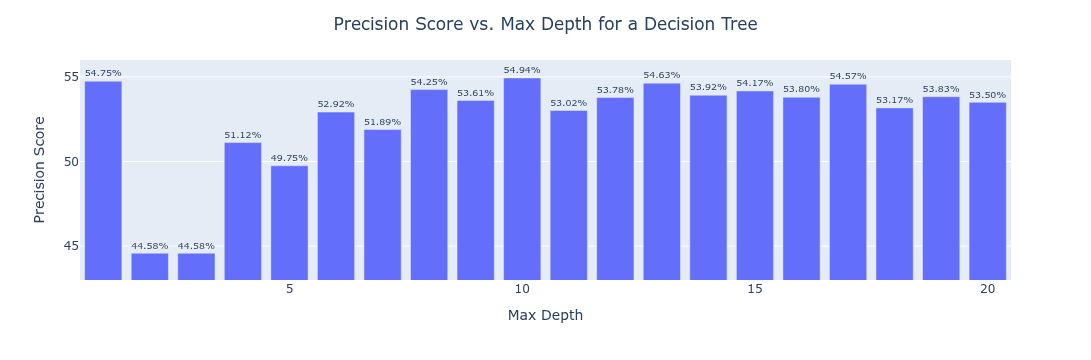

In [67]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(list(precision_by_depth.items()), columns=['max_depth', 'precision_score'])
df.loc[:,'precision_score'] = df.precision_score*100.0 # need for % visualisation

# Create the bar chart using Plotly Express
fig = px.bar(df,
             x='max_depth',
             y='precision_score',
            #  title='Precision Score vs. Max Depth for a Decision Tree',
             labels={'max_depth': 'Max Depth', 'precision_score': 'Precision Score'},
             range_y=[43, 56],
             text='precision_score')

# Update the text format to display as percentages
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Center the title
fig.update_layout(title={'text': 'Precision Score vs. Max Depth for a Decision Tree', 'x': 0.5, 'xanchor': 'center'})


# Show the figure
fig.show()
     

In [37]:
%%time
clf_17, train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=17)


# predict on a full dataset
y_pred_all = clf_17.predict(X_all)


# defining a new prediction vector is easy now, as the dimensions will match
new_df['pred6_clf_17'] = y_pred_all
     

CPU times: user 1min 46s, sys: 523 ms, total: 1min 46s
Wall time: 1min 46s


In [38]:

best_depth = 10
best_precision = precision_by_depth[best_depth]
     

In [39]:

%%time
clf_best,train_columns = fit_decision_tree(X=X_train_valid,
                           y=y_train_valid,
                           max_depth=best_depth)
     

CPU times: user 1min 9s, sys: 266 ms, total: 1min 10s
Wall time: 1min 10s


In [42]:
# For a DecisionTreeClassifier in scikit-learn, the concept of trainable parameters differs from that of neural networks.
# In decision trees, the parameters are the structure of the tree itself (nodes and splits) rather than weights.
# However, you can still get a sense of the model's complexity by looking at the number of nodes and leaves.

# Here's how you can get this information for your trained DecisionTreeClassifier (referred to as clf_best):

# Get the number of nodes and leaves in the tree
n_nodes = clf_best.tree_.node_count
n_leaves = clf_best.get_n_leaves()

print(f"Number of nodes: {n_nodes}")
print(f"Number of leaves: {n_leaves}")

Number of nodes: 1293
Number of leaves: 647


In [43]:
clf_best

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
# predict on a full dataset
y_pred_clf_best = clf_best.predict(X_all)
     

In [41]:
# defining a new prediction vector is easy now, as the dimensions will match
new_df['pred6_clf_best'] = y_pred_clf_best

In [46]:
# new prediction is added --> need to recalculate the correctness
PREDICTIONS, IS_CORRECT = get_predictions_correctness(df = new_df, to_predict = to_predict)

Prediction columns founded: ['pred0_manual_cci', 'pred1_manual_prev_g1', 'pred2_manual_prev_g1_and_snp', 'pred3_manual_dgs10_5', 'pred4_manual_dgs10_fedfunds', 'pred5_clf_13', 'pred6_clf_17', 'pred6_clf_best']
Created columns is_correct: ['is_correct_pred0', 'is_correct_pred1', 'is_correct_pred2', 'is_correct_pred3', 'is_correct_pred4', 'is_correct_pred5', 'is_correct_pred6']
Precision on TEST set for each prediction:
Prediction column:pred0_manual_cci , is_correct_column: is_correct_pred0
is_correct_pred0
1    1364
0    1129
Name: count, dtype: int64
is_correct_pred0
1    0.547132
0    0.452868
Name: count, dtype: float64
---------
Prediction column:pred1_manual_prev_g1 , is_correct_column: is_correct_pred1
is_correct_pred1
1    32137
0    28616
Name: count, dtype: int64
is_correct_pred1
1    0.528978
0    0.471022
Name: count, dtype: float64
---------
Prediction column:pred2_manual_prev_g1_and_snp , is_correct_column: is_correct_pred2
is_correct_pred2
1    24724
0    22424
Name: coun

# **Random Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier
import time


     

In [46]:
# (12 min runtime FOR v28 machine) UNCOMMENT BELOW TO RUN HYPERPARAMs optimisation again
precision_matrix = {}
best_precision = 0
best_depth = 0
best_estimators = 1

for depth in [5, 7, 9, 11, 13, 15, 17, 19]:
  for estimators in [10,50,100,200]:
    print(f'Working with HyperParams: depth = {depth}, estimators = {estimators}')

    # Start timing
    start_time = time.time()
    # fitting the tree on X_train, y_train
    rf = RandomForestClassifier(n_estimators = estimators,
                                max_depth = depth,
                                random_state = 42,
                                n_jobs = -1)

    rf = rf.fit(X_train_valid, y_train_valid)

    # getting the predictions for TEST and accuracy score
    y_pred_valid = rf.predict(X_valid)
    precision_valid = precision_score(y_valid, y_pred_valid)
    y_pred_test = rf.predict(X_test)
    precision_test = precision_score(y_test, y_pred_test)
    print(f'  Precision on test is {precision_test}, (precision on valid is {precision_valid} - tend to overfit)')

    # saving to the dict
    precision_matrix[depth, estimators] = round(precision_test,4)

    # Measure elapsed time
    elapsed_time = time.time() - start_time
    print(f'Time for training: {elapsed_time:.2f} seconds, or {elapsed_time/60:.2f} minutes')

    # updating the best precision
    if precision_test >= best_precision:
      best_precision = round(precision_test,4)
      best_depth = depth
      best_estimators = estimators
      print(f'New best precision found for depth={depth}, estimators = {estimators}')

    print('------------------------------')

print(f'Matrix of precisions: {precision_matrix}')
print(f'The best precision is {best_precision} and the best depth is {best_depth} ')
     

Working with HyperParams: depth = 5, estimators = 10
  Precision on test is 0.5573037037037037, (precision on valid is 0.6107155588527164 - tend to overfit)
Time for training: 4.86 seconds, or 0.08 minutes
New best precision found for depth=5, estimators = 10
------------------------------
Working with HyperParams: depth = 5, estimators = 50
  Precision on test is 0.5592616956235731, (precision on valid is 0.6264133337304069 - tend to overfit)
Time for training: 17.48 seconds, or 0.29 minutes
New best precision found for depth=5, estimators = 50
------------------------------
Working with HyperParams: depth = 5, estimators = 100
  Precision on test is 0.5615281597268369, (precision on valid is 0.6320199571484615 - tend to overfit)
Time for training: 32.40 seconds, or 0.54 minutes
New best precision found for depth=5, estimators = 100
------------------------------
Working with HyperParams: depth = 5, estimators = 200
  Precision on test is 0.5648590772425429, (precision on valid is 0.6

In [37]:
# uncomment when you run the hyperparam tuning again
print(precision_matrix)
     


{(5, 10): 0.5573, (5, 50): 0.5593, (5, 100): 0.5615, (5, 200): 0.5649, (7, 10): 0.5185, (7, 50): 0.5211, (7, 100): 0.526, (7, 200): 0.5442, (9, 10): 0.5377, (9, 50): 0.5226, (9, 100): 0.5296, (9, 200): 0.5399, (11, 10): 0.5334, (11, 50): 0.5202, (11, 100): 0.5279, (11, 200): 0.5237, (13, 10): 0.5411, (13, 50): 0.5422, (13, 100): 0.5436, (13, 200): 0.5445, (15, 10): 0.5342, (15, 50): 0.5268, (15, 100): 0.5321, (15, 200): 0.5279, (17, 10): 0.5438, (17, 50): 0.5316, (17, 100): 0.5303, (17, 200): 0.5427, (19, 10): 0.5509, (19, 50): 0.5406, (19, 100): 0.539, (19, 200): 0.5376}


In [43]:
# pre-calculated best precision matrix (max_depth, n_estimators) for Random Forest
precision_matrix = best_precision_matrix_random_forest = best_precision_matrix_random_forest = {(5, 10): 0.5573, (5, 50): 0.5593, (5, 100): 0.5615, (5, 200): 0.5649, (7, 10): 0.5185, (7, 50): 0.5211, (7, 100): 0.526, (7, 200): 0.5442, (9, 10): 0.5377, (9, 50): 0.5226, (9, 100): 0.5296, (9, 200): 0.5399, (11, 10): 0.5334, (11, 50): 0.5202, (11, 100): 0.5279, (11, 200): 0.5237, (13, 10): 0.5411, (13, 50): 0.5422, (13, 100): 0.5436, (13, 200): 0.5445, (15, 10): 0.5342, (15, 50): 0.5268, (15, 100): 0.5321, (15, 200): 0.5279, (17, 10): 0.5438, (17, 50): 0.5316, (17, 100): 0.5303, (17, 200): 0.5427, (19, 10): 0.5509, (19, 50): 0.5406, (19, 100): 0.539, (19, 200): 0.5376}

In [48]:
# pre-calculated best precision matrix (max_depth, n_estimators) for Random Forest
best_precision_matrix_random_forest = precision_matrix

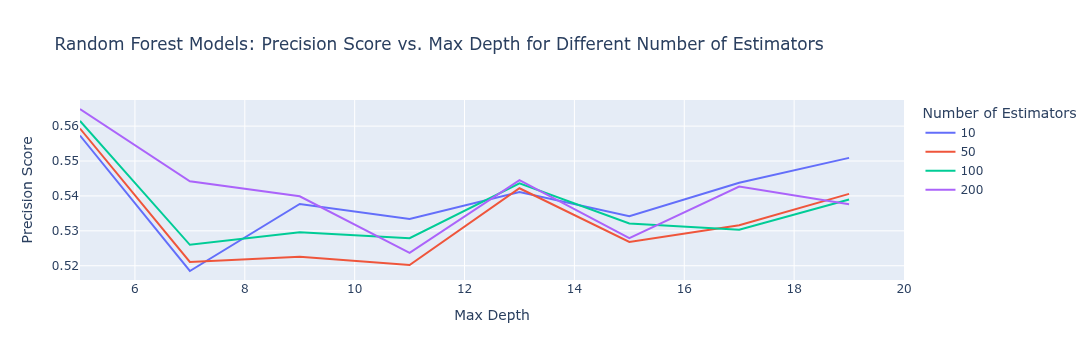

In [49]:
# Convert data to DataFrame
df = pd.DataFrame.from_dict(best_precision_matrix_random_forest, orient='index', columns=['precision_score']).reset_index()

# Rename the columns for clarity
df.columns = ['max_depth_and_metric', 'precision_score']

# Separate the tuple into two columns
df[['max_depth', 'n_estimators']] = pd.DataFrame(df['max_depth_and_metric'].tolist(), index=df.index)

# Drop the combined column
df = df.drop(columns=['max_depth_and_metric'])

# Create line plot using Plotly Express
fig = px.line(df, x='max_depth', y='precision_score', color='n_estimators',
              labels={'max_depth': 'Max Depth', 'precision_score': 'Precision Score', 'n_estimators': 'Number of Estimators'},
              title='Random Forest Models: Precision Score vs. Max Depth for Different Number of Estimators')

# Adjust x-axis range
fig.update_xaxes(range=[5, 20])

# Show the figure
fig.show()
     

In [44]:
# MANUALLY SELECTED BEST - should have enough complexity and smoothness (n_estimators)
rf_best_n_estimators = 100
# MANUALLY SELECTED BEST - should have enough complexity
rf_best_max_depth = 13
     


In [45]:
%%time

#
# several minutes to compute (2 min)

rf_best = RandomForestClassifier(n_estimators = rf_best_n_estimators,
                                 max_depth = rf_best_max_depth,
                                 random_state = 42,
                                 n_jobs = -1)

rf_best = rf_best.fit(X_train_valid, y_train_valid)

CPU times: user 8min 16s, sys: 774 ms, total: 8min 17s
Wall time: 1min 5s


# **Deep Neural Network (DNN)**

In [45]:
# https://towardsdatascience.com/hyperparameter-optimization-with-keras-b82e6364ca53


# Extended params set

# p = {'lr': [0.01, 0.03,0.1, 0.3,1,3,10],
#      'first_neuron': [0,16,32,64,128,256],
#      'second_neuron':[0,16,32,64,128,256],
#      'first_dropout':[0,0.2,0.3],
#      'second_dropout':[0,0.2,0.3],
#      'activation_first':['relu','sigmoid','linear'],
#      'activation_second':['relu','sigmoid','linear'],
#     #  'activation_first':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
#     #  'activation_second':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
#     #  'batch_size':(2,30,10),
#     #  'loss': ('mse','mae'),
#     #  'epochs':[150],
#     #  'shape': ['brick','long_funnel'],
#      'optimizer':['adam', 'nadam', 'rmaprop','sgd'],
#     #  'losses': [logcosh, binary_crossentropy],
#     #  'last_activation':[sigmoid]
#      }


# Reduced params set and available options
p = {'lr': [0.1],
     'first_neuron': [12,24,32,48,96, 128, 196, 256],
     'second_neuron':[12,24,32,48,96, 128, 196, 256],
     'first_dropout':[0.1],
     'second_dropout':[0.1],
     'activation_first':['relu','sigmoid','softplus','tanh'],
     'activation_second':['relu'],
    #  'activation_first':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
    #  'activation_second':('relu','elu','tanh','sigmoid','linear','softplus','selu', 'softsign','exponential'),
    #  'batch_size':(2,30,10),
    #  'loss': ('mse','mae'),
    #  'epochs':[150],
    #  'shape': ['brick','long_funnel'],
     'optimizer':['adam','nadam','sgd','rmaprop'],
    #  'losses': [logcosh, binary_crossentropy],
    #  'last_activation':[sigmoid]
     }


# Number of models to run and write to SHEETS:
count_models=0

nn_params = {}

for lr in p['lr']:
  for first_neuron in p['first_neuron']:
    for second_neuron in p['second_neuron']:
      for first_dropout in p['first_dropout']:
        for second_dropout in p['second_dropout']:
          for activation_first in p['activation_first']:
            for activation_second in p['activation_second']:
              for optimizer in p['optimizer']:
                # print(lr,first_neuron,second_neuron,first_dropout,second_dropout,activation_first,activation_second,optimizer,sep='/')
                count_models=count_models+1
                nn_params['learning_rate'] = lr
                nn_params['first_layer_neurons'] = first_neuron
                nn_params['first_layer_dropout'] = first_dropout
                nn_params['second_layer_neurons'] = second_neuron
                nn_params['second_layer_dropout'] = second_dropout
                nn_params['activation_first_layer'] = activation_first
                nn_params['activation_second_layer'] = activation_second
                nn_params['optimizer'] = optimizer
                # features count as an input shape
                nn_params['input_shape'] = len(X_train.keys())

# Current set of models to try
print(count_models)
     

1024


In [46]:
# example of a Neural Network HyperParams setup
nn_params
     

{'learning_rate': 0.1,
 'first_layer_neurons': 256,
 'first_layer_dropout': 0.1,
 'second_layer_neurons': 256,
 'second_layer_dropout': 0.1,
 'activation_first_layer': 'tanh',
 'activation_second_layer': 'relu',
 'optimizer': 'rmaprop',
 'input_shape': 347}

In [49]:
import tensorflow as tf
import keras
from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense, Input, Dropout, Activation

In [50]:
# building one Neural Network when Parameters are known:
import datetime

# len(rez_train.keys())
def build_model(nn_params):
  # lr, first_neuron, second_neuron, first_dropout, second_dropout, activation_first, activation_second, optimizer
  model = keras.Sequential([
  layers.Dense(nn_params['first_layer_neurons'],
               activation=nn_params['activation_first_layer'],
               input_shape=[nn_params['input_shape']]),
  layers.Dropout(nn_params['first_layer_dropout']),
  layers.Dense(nn_params['second_layer_neurons'],
               activation=nn_params['activation_second_layer']),
  layers.Dropout(nn_params['second_layer_dropout']),
  layers.Dense(1, activation='sigmoid') # sigmoid is important for a Neural Network
  ])

  if optimizer == 'adam':
    opt = keras.optimizers.Adam(lr)
  elif optimizer == 'nadam':
    opt = keras.optimizers.Nadam(lr)
  elif optimizer == 'rmsprop':
    opt = keras.optimizers.RMSprop(lr)
  elif optimizer == 'sgd':
    opt = keras.optimizers.SGD(lr)
  else:
    opt = keras.optimizers.Adagrad(lr)
  model.compile(loss='binary_crossentropy', # mae/rmse for the Regression,
                optimizer=opt,
                metrics=['accuracy',keras.metrics.Precision()]) # or use [keras.metrics.Precision()] for a binary model : https://keras.io/api/metrics/classification_metrics/#precision-class
  return model
     

In [51]:
nn_params

{'learning_rate': 0.1,
 'first_layer_neurons': 256,
 'first_layer_dropout': 0.1,
 'second_layer_neurons': 256,
 'second_layer_dropout': 0.1,
 'activation_first_layer': 'tanh',
 'activation_second_layer': 'relu',
 'optimizer': 'rmaprop',
 'input_shape': 347}

In [52]:
# construct a model based on those hyperparams
model = build_model(nn_params)
model.summary()
# model.get_config()

/home/julie/miniconda3/envs/market_analytics/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

E0000 00:00:1756667380.068836    9874 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1756667380.201844    9874 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        89,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,137 (606.00 KB)

 Trainable params: 155,137 (606.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# trainable params in the model with max params (large hidden layers shape)
model.count_params()

155137

In [54]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print()
    print('.', end='')
     

In [55]:
# read tutorial about Binary Classification with Neural Network
# https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit


# HYPER_PARAMS_SPACE = PARAMS space
# WHEN MAX_MODELS>0: return after MAX_MODELS checked
# MAX_EPOCHS: how many epochs (periods when model weights are updated) do we need?
def train_neural_network_with_hyperparams(HYPER_PARAMS_SPACE, MAX_MODELS=0, MAX_EPOCHS=250, EARLY_STOPPING_PATIENCE=20):

  # The patience parameter is the amount of epochs to check for improvement
  early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy',  # we want accuracy to improve every single iteration (or at least in several iterations (EARLY STOPPING PARAM))
                                             patience = EARLY_STOPPING_PATIENCE)
  nn_params = {} # current hyperParams settings
  cur = 0 # models trained

  # best stats
  best_accuracy = 0
  best_model = None
  best_history = None

  for lr in HYPER_PARAMS_SPACE['lr']:
    for first_dropout in HYPER_PARAMS_SPACE['first_dropout']:
      for second_dropout in HYPER_PARAMS_SPACE['second_dropout']:
        for activation_first in HYPER_PARAMS_SPACE['activation_first']:
          for activation_second in HYPER_PARAMS_SPACE['activation_second']:
            for optimizer in HYPER_PARAMS_SPACE['optimizer']:
              for first_neuron in HYPER_PARAMS_SPACE['first_neuron']:
                for second_neuron in HYPER_PARAMS_SPACE['second_neuron']:
                  cur = cur+1

                  nn_params['learning_rate'] = lr
                  nn_params['first_layer_neurons'] = first_neuron
                  nn_params['first_layer_dropout'] = first_dropout
                  nn_params['second_layer_neurons'] = second_neuron
                  nn_params['second_layer_dropout'] = second_dropout
                  nn_params['activation_first_layer'] = activation_first
                  nn_params['activation_second_layer'] = activation_second
                  nn_params['optimizer'] = optimizer

                  # features count as an input shape
                  nn_params['input_shape'] = len(X_train.keys())

                  print(f'Using HyperParams:{nn_params}')

                  model = build_model(nn_params)
                  # model.summary()

                  frame = pd.DataFrame(data=[cur,lr,first_neuron,second_neuron,first_dropout,second_dropout, activation_first, activation_second, optimizer])

                  print(f"Training model {cur} with trainable params {model.count_params()} :")
                  t_start = datetime.datetime.now()
                  history = model.fit(
                                        X_train_valid,
                                        y_train_valid,
                                        epochs=MAX_EPOCHS,
                                        validation_data = (X_test, y_test),
                                        verbose=1, #change to 0 if you don't want to see the progress
                                        callbacks=[early_stop,PrintDot()])

                  t_diff = datetime.datetime.now() - t_start
                  frame = pd.DataFrame(data=[t_diff.seconds,
                                          len(history.epoch),
                                          history.history['val_accuracy'][0], # start of learning
                                          history.history['val_accuracy'][len(history.epoch)-1], # end of learning
                                          #  history.history['val_precision_2'][0], # start of learning
                                          #  history.history['val_precision_2'][len(history.epoch)-1], # end of learning
                                          ])

                  if history.history['val_accuracy'][len(history.epoch)-1]> best_accuracy:
                    best_accuracy = history.history['val_accuracy'][len(history.epoch)-1]
                    best_model = model
                    best_history = history

                  # early stopping of hyper params loop
                  if MAX_MODELS>0 and cur>=MAX_MODELS:
                    return best_model, best_history.history

                  print('==============================================================')

  return best_model, best_history.history #full hyper params search on all models
     

In [57]:
# returns best_model (trained) and best_history (history of train operations)
best_model, best_history = train_neural_network_with_hyperparams(HYPER_PARAMS_SPACE=p,
                                                                 MAX_MODELS=2, #not more than 2 models
                                                                 MAX_EPOCHS=250,
                                                                 EARLY_STOPPING_PATIENCE=10
                                                                 )

Using HyperParams:{'learning_rate': 0.1, 'first_layer_neurons': 12, 'first_layer_dropout': 0.1, 'second_layer_neurons': 12, 'second_layer_dropout': 0.1, 'activation_first_layer': 'relu', 'activation_second_layer': 'relu', 'optimizer': 'adam', 'input_shape': 347}
Training model 1 with trainable params 4345 :
Epoch 1/250


2025-08-31 12:16:09.993905: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 710442248 exceeds 10% of free system memory.


15993/15996 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5924 - loss: 1068671.3750 - precision_1: 0.5963

2025-08-31 12:16:33.608005: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 148507672 exceeds 10% of free system memory.



15996/15996 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.5941 - loss: 127500.9609 - precision_1: 0.5956 - val_accuracy: 0.5475 - val_loss: 0.6929 - val_precision_1: 0.5475
Epoch 2/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.5950 - loss: 1401.8591 - precision_1: 0.5954 - val_accuracy: 0.5475 - val_loss: 0.6937 - val_precision_1: 0.5475
Epoch 3/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.5951 - loss: 423.5176 - precision_1: 0.5955 - val_accuracy: 0.5475 - val_loss: 1.0082 - val_precision_1: 0.5475
Epoch 4/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.5952 - loss: 234.8054 - precision_1: 0.5954 - val_accuracy: 0.5475 - val_loss: 0.7089 - val_precision_1: 0.5475
Epoch 5/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.5953 - loss: 111.2818 - precision_1: 0.5955 - val_accuracy: 0.5475 - val_loss: 0.6941 - val_precision_1: 0.5475
Epoch 6/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.5951 - loss: 45

/home/julie/miniconda3/envs/market_analytics/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/250


2025-08-31 12:21:17.523903: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 710442248 exceeds 10% of free system memory.


15992/15996 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5876 - loss: 437171.2812 - precision_2: 0.5969

2025-08-31 12:21:39.282951: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 148507672 exceeds 10% of free system memory.



15996/15996 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.5912 - loss: 60114.9727 - precision_2: 0.5959 - val_accuracy: 0.5470 - val_loss: 15.6779 - val_precision_2: 0.5473
Epoch 2/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.5939 - loss: 495.8469 - precision_2: 0.5956 - val_accuracy: 0.5466 - val_loss: 3.4102 - val_precision_2: 0.5471
Epoch 3/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.5941 - loss: 245.1774 - precision_2: 0.5955 - val_accuracy: 0.5465 - val_loss: 6.3050 - val_precision_2: 0.5471
Epoch 4/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.5943 - loss: 243.0632 - precision_2: 0.5955 - val_accuracy: 0.5469 - val_loss: 2.9113 - val_precision_2: 0.5474
Epoch 5/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.5947 - loss: 100.9639 - precision_2: 0.5955 - val_accuracy: 0.5452 - val_loss: 4.0313 - val_precision_2: 0.5466
Epoch 6/250
15996/15996 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.5944 - loss: 292

In [58]:
# UNCOMMENT TO RUN AGAIN

best_history_nn = best_history
best_model_nn = best_model
     

In [59]:
best_model_nn.summary()
     

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │         4,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,692 (33.96 KB)

 Trainable params: 4,345 (16.97 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,347 (16.98 KB)

In [64]:
best_history_nn 

{'accuracy': [0.5941122770309448,
  0.5949797630310059,
  0.5951458215713501,
  0.5952122211456299,
  0.5953118801116943,
  0.5951184630393982,
  0.5953138470649719,
  0.5953353047370911,
  0.5953646302223206,
  0.5953274965286255,
  0.59528648853302,
  0.5952571630477905],
 'loss': [127500.9609375,
  1401.859130859375,
  423.5176086425781,
  234.80543518066406,
  111.2817611694336,
  450.663330078125,
  170.1060791015625,
  27.992456436157227,
  22.970500946044922,
  32.07240295410156,
  46.54704284667969,
  37.956539154052734],
 'precision_1': [0.5955542325973511,
  0.5954499840736389,
  0.5954519510269165,
  0.595412015914917,
  0.5954863429069519,
  0.5954053401947021,
  0.5954195261001587,
  0.5954006314277649,
  0.5954169631004333,
  0.5953866839408875,
  0.5953797698020935,
  0.5953735113143921],
 'val_accuracy': [0.547469973564148,
  0.5474886298179626,
  0.5474886298179626,
  0.5474792718887329,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.547488629817

In [44]:
best_history_nn = {'accuracy': [0.5941122770309448,
  0.5949797630310059,
  0.5951458215713501,
  0.5952122211456299,
  0.5953118801116943,
  0.5951184630393982,
  0.5953138470649719,
  0.5953353047370911,
  0.5953646302223206,
  0.5953274965286255,
  0.59528648853302,
  0.5952571630477905],
 'loss': [127500.9609375,
  1401.859130859375,
  423.5176086425781,
  234.80543518066406,
  111.2817611694336,
  450.663330078125,
  170.1060791015625,
  27.992456436157227,
  22.970500946044922,
  32.07240295410156,
  46.54704284667969,
  37.956539154052734],
 'precision_1': [0.5955542325973511,
  0.5954499840736389,
  0.5954519510269165,
  0.595412015914917,
  0.5954863429069519,
  0.5954053401947021,
  0.5954195261001587,
  0.5954006314277649,
  0.5954169631004333,
  0.5953866839408875,
  0.5953797698020935,
  0.5953735113143921],
 'val_accuracy': [0.547469973564148,
  0.5474886298179626,
  0.5474886298179626,
  0.5474792718887329,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626],
 'val_loss': [0.6928743720054626,
  0.6937462091445923,
  1.0082015991210938,
  0.708885669708252,
  0.6941112279891968,
  0.6933423280715942,
  0.6935994029045105,
  0.69329434633255,
  0.6932147145271301,
  0.6929731369018555,
  0.6929540634155273,
  0.6934981942176819],
 'val_precision_1': [0.5474801659584045,
  0.5474886298179626,
  0.5474886298179626,
  0.5474843978881836,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626,
  0.5474886298179626]}

In [61]:
X_train_valid.shape

(511846, 347)

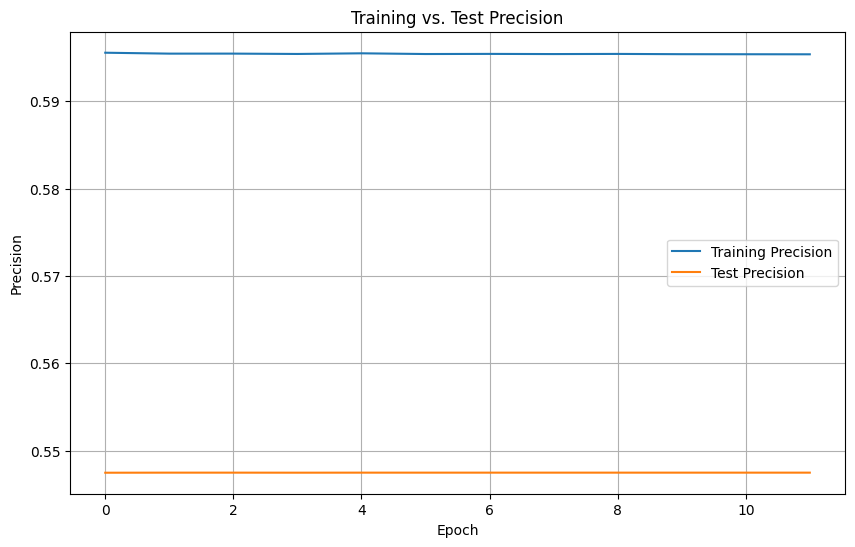

In [45]:
# Learning visualisation for the Deep Neural Network (DNN)
# The model is not actually training, as the precision and accuracy score are not improving on TRAIN/TEST with more Epochs

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.plot(best_history_nn['precision_1'], label='Training Precision')
plt.plot(best_history_nn['val_precision_1'], label='Test Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training vs. Test Precision')
plt.legend()
plt.grid(True)
plt.show()

best model1 (clf_best): Decision Tree (max_depth=10 - manually selected second-best model) best model2 (rf_best): Random Forest (n_estimators=100, max_depth=13)

# **Different Decision rules to improve precision (varying threshold)**

In [46]:
# y_pred_test = best_lr.predict_proba(X_test)

# predicting probability instead of a lable

y_pred_test = rf_best.predict_proba(X_test)
y_pred_test_class1 = [k[1] for k in y_pred_test] # k[1] is the second element in the list of Class predictions
     


In [58]:
# example prediction of probabilities
y_pred_test
     

array([[0.47983616, 0.52016384],
       [0.46662118, 0.53337882],
       [0.46363437, 0.53636563],
       ...,
       [0.55782004, 0.44217996],
       [0.56760601, 0.43239399],
       [0.50766696, 0.49233304]], shape=(106994, 2))

In [47]:
y_pred_test_class1_df = pd.DataFrame(y_pred_test_class1, columns=['Class1_probability'])
y_pred_test_class1_df.head()
     


,Class1_probability
0,0.520164
1,0.533379
2,0.536366
3,0.535809
4,0.533778


In [60]:
# Mean prediction is 0.54, median is 0.55, 75% quantile is 0.60
y_pred_test_class1_df.describe().T
     

,count,mean,std,min,25%,50%,75%,max
Class1_probability,106994.0,0.500209,0.064337,0.303705,0.454131,0.492074,0.536829,0.731517


In [61]:
# Unconditional probability of a positive growth is 55.5%
y_test.sum()/y_test.count()
     

np.float64(0.5474886442230406)

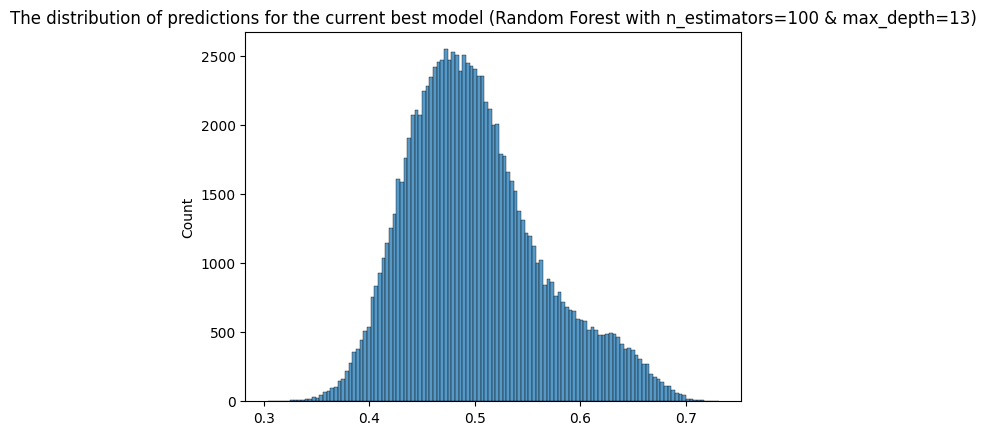

In [62]:
# perfect shape for a Random Forest predictions vs. a Decision Tree - it's an average across many trees (estimators)
sns.histplot(y_pred_test_class1)

# Add a title
plt.title('The distribution of predictions for the current best model (Random Forest with n_estimators=100 & max_depth=13)')

# Show the plot
plt.show()

In [48]:
# tpr (True Positive Rate) vs. fpr (False Positive Rate) dataframe
# tp = True Positive
# tn = True Negative
# fp = False Positive
# fn = False Negative
# Decision Rule :  "y_pred>= Threshold" for Class "1"

# when only_even=True --> we'll have a step ==0.02 and leave only even records

def tpr_fpr_dataframe(y_true, y_pred, only_even=False):
    scores = []

    if only_even==False:
      thresholds = np.linspace(0, 1, 101) #[0, 0.01, 0.02, ...0.99,1.0]
    else:
      thresholds = np.linspace(0, 1, 51) #[0, 0.02, 0.04,  ...0.98,1.0]

    for t in thresholds:

        actual_positive = (y_true == 1)
        actual_negative = (y_true == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        if tp + fp > 0:
          precision = tp / (tp + fp)

        if tp + fn > 0:
          recall = tp / (tp + fn)

        if precision+recall > 0:
          f1_score = 2*precision*recall / (precision+recall)

        accuracy = (tp+tn) / (tp+tn+fp+fn)

        scores.append((t, tp, fp, fn, tn, precision, recall, accuracy, f1_score))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn','precision','recall', 'accuracy','f1_score']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [49]:
df_scores = tpr_fpr_dataframe(y_test,
                              y_pred_test_class1,
                              only_even=True)

In [50]:
# full df_scores
df_scores

,threshold,tp,fp,fn,tn,precision,recall,accuracy,f1_score,tpr,fpr
0,0.00,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000
1,0.02,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000
2,0.04,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000
3,0.06,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000
4,0.08,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000
5,0.10,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000
6,0.12,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000
7,0.14,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000
8,0.16,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000
9,0.18,58578,48416,0,0,0.547489,1.000000,0.547489,0.707583,1.000000,1.000000


In [51]:
df_scores[(df_scores.threshold>=0.5) & (df_scores.threshold<=0.8)]

,threshold,tp,fp,fn,tn,precision,recall,accuracy,f1_score,tpr,fpr
25,0.50,26064,21885,32514,26531,0.543578,0.444945,0.491570,0.489341,0.444945,0.452020
26,0.52,19017,16216,39561,32200,0.539750,0.324644,0.478690,0.405432,0.324644,0.334931
27,0.54,13522,11854,45056,36562,0.532866,0.230838,0.468101,0.322129,0.230838,0.244836
28,0.56,9455,8876,49123,39540,0.515793,0.161409,0.457923,0.245875,0.161409,0.183328
29,0.58,6567,6746,52011,41670,0.493277,0.112107,0.450838,0.182693,0.112107,0.139334
30,0.60,4440,5011,54138,43405,0.469792,0.075796,0.447175,0.130533,0.075796,0.103499
31,0.62,2908,3465,55670,44951,0.456300,0.049643,0.447305,0.089544,0.049643,0.071567
32,0.64,1644,2002,56934,46414,0.450905,0.028065,0.449165,0.052841,0.028065,0.041350
33,0.66,668,951,57910,47465,0.412600,0.011404,0.449866,0.022194,0.011404,0.019642
34,0.68,194,312,58384,48104,0.383399,0.003312,0.451408,0.006567,0.003312,0.006444


<Axes: title={'center': 'Precision vs. Recall for the Best Model (Random Forest with n_estimators=100 & max_depth=13)'}, xlabel='threshold'>

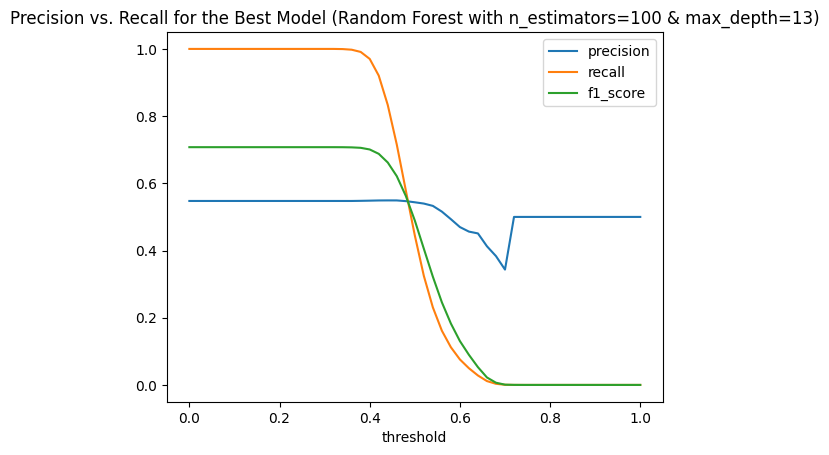

In [52]:
# Try to find high Precision score points

df_scores.plot.line(x='threshold',
                    y=['precision','recall', 'f1_score'],
                    title = 'Precision vs. Recall for the Best Model (Random Forest with n_estimators=100 & max_depth=13)')

In [53]:
# adding Decision Tree predictors (clf_best) to the dataset for 2 new rules based on thresholds


y_pred_all = clf_best.predict_proba(X_all)
y_pred_all_class1 = [k[1] for k in y_pred_all] #list of predictions for class "1"
y_pred_all_class1_array = np.array(y_pred_all_class1) # (Numpy Array) np.array of predictions for class "1" , converted from a list

# defining a new prediction vector is easy now, as the dimensions will match
new_df['proba_pred8'] = y_pred_all_class1_array
new_df['pred8_clf_second_best_rule_84'] = (y_pred_all_class1_array >= 0.84).astype(int)

new_df['proba_pred9'] = y_pred_all_class1_array
new_df['pred9_clf_second_best_rule_92'] = (y_pred_all_class1_array >= 0.92).astype(int)
     

In [58]:
# adding Random Forest predictors (rf_best)
rf_best

,n_estimators,100
,criterion,'gini'
,max_depth,13
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
# make predictions of probabilities using the Random Forest model (rf_best)

y_pred_all = rf_best.predict_proba(X_all)
y_pred_all_class1 = [k[1] for k in y_pred_all] #list of predictions for class "1"
y_pred_all_class1_array = np.array(y_pred_all_class1) # (Numpy Array) np.array of predictions for class "1" , converted from a list


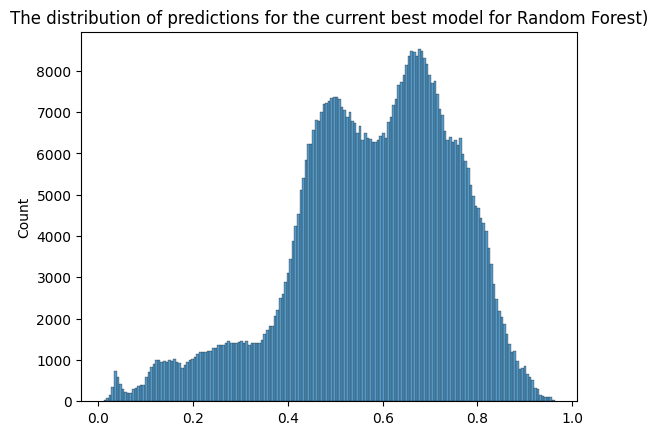

In [55]:

# PREDICTIONS ON A FULL DATASET - different from on a TRAINED SET (too optimistic? or just a bullish environment?)
sns.histplot(y_pred_all_class1)

# Add a title
plt.title('The distribution of predictions for the current best model for Random Forest)')

# Show the plot
plt.show()
     

In [56]:

# adding Random Forest predictors (rf_best) to the dataset for 2 new rules, based on Thresholds
# defining a new prediction vector is easy now, as the dimensions will match
new_df['proba_pred10'] = y_pred_all_class1_array
new_df['pred10_rf_best_rule_55'] = (y_pred_all_class1_array >= 0.55).astype(int)

new_df['proba_pred11'] = y_pred_all_class1_array
new_df['pred11_rf_best_rule_65'] = (y_pred_all_class1_array >= 0.65).astype(int)
     

<Axes: >

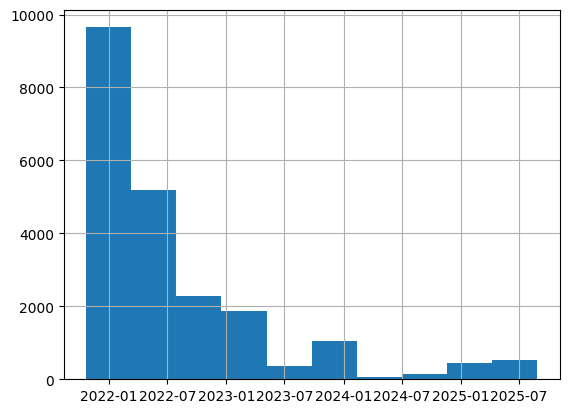

In [57]:
# Many positive predictions
new_df[(new_df.split=='test')&(new_df.pred10_rf_best_rule_55==1)].Date.hist()

<Axes: >

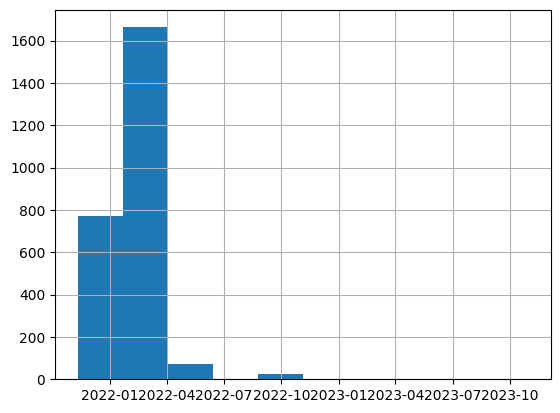

In [58]:
# Vs. less positives on higher-threshold rule
new_df[(new_df.split=='test')&(new_df.pred11_rf_best_rule_65==1)].Date.hist()
     

In [59]:
# sample of rare predictions with high threshold vs. other predictions
new_df[(new_df.split=='test')&(new_df.pred11_rf_best_rule_65==1)].sort_values(by='Date').sample(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker_type,Ticker,Year,...,pred6_clf_17,pred6_clf_best,proba_pred8,pred8_clf_second_best_rule_84,proba_pred9,pred9_clf_second_best_rule_92,proba_pred10,pred10_rf_best_rule_55,proba_pred11,pred11_rf_best_rule_65
5567,148.611237,152.371847,148.106219,151.722534,4594300.0,0.0,0.0,biggest_company,TXN,2022,...,0,0,0.265866,0,0.265866,0,0.654737,1,0.654737,1
2438,536.460022,565.780029,533.109985,559.580017,1647700.0,0.0,0.0,biggest_company,NOW,2022,...,1,1,0.850735,1,0.850735,0,0.669399,1,0.669399,1
2865,98.704963,100.935149,98.618444,100.790955,91400.0,0.0,0.0,commodity_fund,REMX,2022,...,1,0,0.478644,0,0.478644,0,0.677790,1,0.677790,1
5569,108.571530,109.006024,107.415772,108.058823,4609200.0,0.0,0.0,biggest_company,IBM,2022,...,1,1,0.850735,1,0.850735,0,0.652300,1,0.652300,1
5570,50.691306,51.193019,49.897688,50.426765,26887800.0,0.0,0.0,biggest_company,WFC,2022,...,1,1,0.653631,0,0.653631,0,0.651712,1,0.651712,1
5566,148.703141,150.466491,148.595720,149.759354,6631400.0,0.0,0.0,biggest_company,JNJ,2022,...,1,0,0.265866,0,0.265866,0,0.654241,1,0.654241,1
5546,74.649190,74.803949,73.465724,73.966423,10848100.0,0.0,0.0,biggest_company,NEE,2022,...,1,1,0.702315,0,0.702315,0,0.695867,1,0.695867,1
5580,147.017609,148.457179,142.771316,142.934280,6163700.0,0.0,0.0,biggest_company,PEP,2022,...,1,1,0.850735,1,0.850735,0,0.659994,1,0.659994,1
5555,160.235733,162.003310,158.576383,161.868042,6980800.0,0.0,0.0,biggest_company,TXN,2022,...,1,1,0.786816,0,0.786816,0,0.652182,1,0.652182,1
2850,95.984521,100.444893,95.177043,100.185349,420800.0,0.0,0.0,commodity_fund,REMX,2022,...,1,1,0.653631,0,0.653631,0,0.659212,1,0.659212,1


In [60]:
# List of ALL current predictions
PREDICTIONS = [k for k in new_df.keys() if k.startswith('pred')]
PREDICTIONS
     

['pred0_manual_cci',
 'pred1_manual_prev_g1',
 'pred2_manual_prev_g1_and_snp',
 'pred3_manual_dgs10_5',
 'pred4_manual_dgs10_fedfunds',
 'pred5_clf_13',
 'pred6_clf_17',
 'pred6_clf_best',
 'pred8_clf_second_best_rule_84',
 'pred9_clf_second_best_rule_92',
 'pred10_rf_best_rule_55',
 'pred11_rf_best_rule_65']

In [61]:
# Pred 10: How many positive prediction per day (out of  112 stocks possible)
pred10_daily_positive_count = pd.DataFrame(new_df[(new_df.split=='test')&(new_df.pred11_rf_best_rule_65==1)].groupby('Date')['pred11_rf_best_rule_65'].count())
     

In [62]:
# Pred 9: How many positive prediction per day (out of 112 stocks possible)
pred9_daily_positive_count = pd.DataFrame(new_df[(new_df.split=='test')&(new_df.pred10_rf_best_rule_55==1)].groupby('Date')['pred10_rf_best_rule_55'].count())
     

In [63]:
# Unique trading days on Test (4 years)
new_df[(new_df.split=='test')].Date.nunique()
     

965

In [64]:
pred10_daily_positive_count

,pred11_rf_best_rule_65
Date,
2021-11-10,1
2021-11-16,2
2021-11-17,1
2021-11-18,1
2021-11-19,4
...,...
2022-10-14,2
2023-03-13,1
2023-03-17,1


array([[<Axes: title={'center': 'pred11_rf_best_rule_65'}>]], dtype=object)

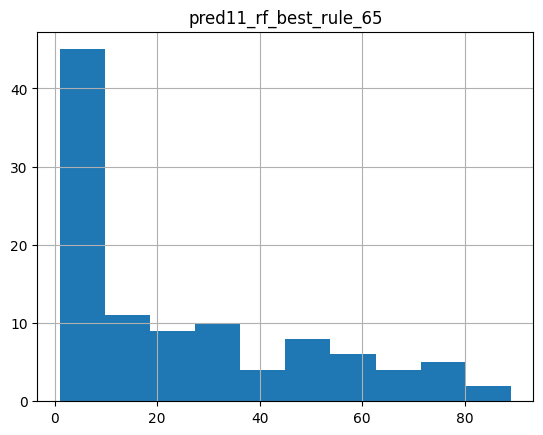

In [65]:
pred10_daily_positive_count.hist()

In [66]:

pred10_daily_positive_count.describe().T
     

,count,mean,std,min,25%,50%,75%,max
pred11_rf_best_rule_65,104.0,24.384615,25.056173,1.0,2.0,15.0,42.0,89.0


In [67]:
pred9_daily_positive_count.describe().T
     

,count,mean,std,min,25%,50%,75%,max
pred10_rf_best_rule_55,597.0,36.194305,41.19306,1.0,3.0,14.0,68.0,110.0


In [68]:
# let's review the Predictions:
PREDICTIONS, IS_CORRECT = get_predictions_correctness(new_df, to_predict=to_predict)


Prediction columns founded: ['pred0_manual_cci', 'pred1_manual_prev_g1', 'pred2_manual_prev_g1_and_snp', 'pred3_manual_dgs10_5', 'pred4_manual_dgs10_fedfunds', 'pred5_clf_13', 'pred6_clf_17', 'pred6_clf_best', 'pred8_clf_second_best_rule_84', 'pred9_clf_second_best_rule_92', 'pred10_rf_best_rule_55', 'pred11_rf_best_rule_65']
Created columns is_correct: ['is_correct_pred0', 'is_correct_pred1', 'is_correct_pred2', 'is_correct_pred3', 'is_correct_pred4', 'is_correct_pred5', 'is_correct_pred6', 'is_correct_pred8', 'is_correct_pred9', 'is_correct_pred10', 'is_correct_pred11']
Precision on TEST set for each prediction:
Prediction column:pred0_manual_cci , is_correct_column: is_correct_pred0
is_correct_pred0
1    1364
0    1129
Name: count, dtype: int64
is_correct_pred0
1    0.547132
0    0.452868
Name: count, dtype: float64
---------
Prediction column:pred1_manual_prev_g1 , is_correct_column: is_correct_pred1
is_correct_pred1
1    32137
0    28616
Name: count, dtype: int64
is_correct_pred1


In [69]:
# check approx. periods : Train, Valid , Test
new_df.groupby('split').Date.agg(['min','max'])

,min,max
split,,
test,2021-10-21,2025-08-26
train,2000-01-03,2017-12-15
validation,2017-12-18,2021-10-20


In [70]:
# Extract number from the prediction column

# Example string
example_string = "pred10_rf_best_rule_60"

# Split the string by '_'
parts = example_string.split('_')

# Extract the part with 'pred' and remove the 'pred' prefix
pred_number = parts[0].replace('pred', '')

# Print the result
print(pred_number)

# Print in one line
print(int(example_string.split('_')[0].replace('pred', '')))

10
10


In [71]:
# all predictions
PREDICTIONS
     

['pred0_manual_cci',
 'pred1_manual_prev_g1',
 'pred2_manual_prev_g1_and_snp',
 'pred3_manual_dgs10_5',
 'pred4_manual_dgs10_fedfunds',
 'pred5_clf_13',
 'pred6_clf_17',
 'pred6_clf_best',
 'pred8_clf_second_best_rule_84',
 'pred9_clf_second_best_rule_92',
 'pred10_rf_best_rule_55',
 'pred11_rf_best_rule_65']

In [72]:
# all predictions on MODELS (not-manual predictions)
PREDICTIONS_ON_MODELS = [p for p in PREDICTIONS if int(p.split('_')[0].replace('pred', ''))>=5]
PREDICTIONS_ON_MODELS
     


['pred5_clf_13',
 'pred6_clf_17',
 'pred6_clf_best',
 'pred8_clf_second_best_rule_84',
 'pred9_clf_second_best_rule_92',
 'pred10_rf_best_rule_55',
 'pred11_rf_best_rule_65']

In [73]:
# all predictions on Models - correctness
IS_CORRECT_ON_MODELS = [p for p in IS_CORRECT if int(p.replace('is_correct_pred', ''))>=5]
IS_CORRECT_ON_MODELS

['is_correct_pred5',
 'is_correct_pred6',
 'is_correct_pred8',
 'is_correct_pred9',
 'is_correct_pred10',
 'is_correct_pred11']

In [74]:
# predictions on models
# pred10_rf_best_rule_60: ONLY 2% of TEST cases predicted with high confidence of growth
new_df.groupby('split')[PREDICTIONS_ON_MODELS].agg(['count','sum','mean']).T

split                                         test          train  \
pred5_clf_13                  count  106994.000000  408053.000000   
                              sum     22281.000000  293682.000000   
                              mean        0.208245       0.719715   
pred6_clf_17                  count  106994.000000  408053.000000   
                              sum     24930.000000  271709.000000   
                              mean        0.233004       0.665867   
pred6_clf_best                count  106994.000000  408053.000000   
                              sum     18638.000000  315111.000000   
                              mean        0.174197       0.772231   
pred8_clf_second_best_rule_84 count  106994.000000  408053.000000   
                              sum     12106.000000   38535.000000   
                              mean        0.113147       0.094436   
pred9_clf_second_best_rule_92 count  106994.000000  408053.000000   
                              sum      9132.000000    7173.000000   
                              mean        0.085351       0.017579   
pred10_rf_best_rule_55        count  106994.000000  408053.000000   
                              sum     21608.000000  270737.000000   
                              mean        0.201955       0.663485   
pred11_rf_best_rule_65        count  106994.000000  408053.000000   
                              sum      2536.000000  184705.000000   
                              mean        0.023702       0.452650   

split                                   validation  
pred5_clf_13                  count  103793.000000  
                              sum     75386.000000  
                              mean        0.726311  
pred6_clf_17                  count  103793.000000  
                              sum     72185.000000  
                              mean        0.695471  
pred6_clf_best                count  103793.000000  
                              sum     79502.000000  
                              mean        0.765967  
pred8_clf_second_best_rule_84 count  103793.000000  
                              sum      4382.000000  
                              mean        0.042219  
pred9_clf_second_best_rule_92 count  103793.000000  
                              sum       226.000000  
                              mean        0.002177  
pred10_rf_best_rule_55        count  103793.000000  
                              sum     73662.000000  
                              mean        0.709701  
pred11_rf_best_rule_65        count  103793.000000  
                              sum     53725.000000  
                              mean        0.517617

In [75]:
# 11 predictions stats (check TEST set)
new_df.groupby('split')[PREDICTIONS].agg(['count','sum','mean']).T

split                                         test          train  \
pred0_manual_cci              count  106994.000000  408053.000000   
                              sum      2493.000000    9881.000000   
                              mean        0.023300       0.024215   
pred1_manual_prev_g1          count  106994.000000  408053.000000   
                              sum     60753.000000  239846.000000   
                              mean        0.567817       0.587781   
pred2_manual_prev_g1_and_snp  count  106994.000000  408053.000000   
                              sum     47148.000000  184740.000000   
                              mean        0.440660       0.452735   
pred3_manual_dgs10_5          count  106994.000000  408053.000000   
                              sum     10780.000000  184366.000000   
                              mean        0.100753       0.451819   
pred4_manual_dgs10_fedfunds   count  106994.000000  408053.000000   
                              sum     24714.000000   93014.000000   
                              mean        0.230985       0.227946   
pred5_clf_13                  count  106994.000000  408053.000000   
                              sum     22281.000000  293682.000000   
                              mean        0.208245       0.719715   
pred6_clf_17                  count  106994.000000  408053.000000   
                              sum     24930.000000  271709.000000   
                              mean        0.233004       0.665867   
pred6_clf_best                count  106994.000000  408053.000000   
                              sum     18638.000000  315111.000000   
                              mean        0.174197       0.772231   
pred8_clf_second_best_rule_84 count  106994.000000  408053.000000   
                              sum     12106.000000   38535.000000   
                              mean        0.113147       0.094436   
pred9_clf_second_best_rule_92 count  106994.000000  408053.000000   
                              sum      9132.000000    7173.000000   
                              mean        0.085351       0.017579   
pred10_rf_best_rule_55        count  106994.000000  408053.000000   
                              sum     21608.000000  270737.000000   
                              mean        0.201955       0.663485   
pred11_rf_best_rule_65        count  106994.000000  408053.000000   
                              sum      2536.000000  184705.000000   
                              mean        0.023702       0.452650   

split                                   validation  
pred0_manual_cci              count  103793.000000  
                              sum      2694.000000  
                              mean        0.025956  
pred1_manual_prev_g1          count  103793.000000  
                              sum     63819.000000  
                              mean        0.614868  
pred2_manual_prev_g1_and_snp  count  103793.000000  
                              sum     53913.000000  
                              mean        0.519428  
pred3_manual_dgs10_5          count  103793.000000  
                              sum     65523.000000  
                              mean        0.631285  
pred4_manual_dgs10_fedfunds   count  103793.000000  
                              sum         0.000000  
                              mean        0.000000  
pred5_clf_13                  count  103793.000000  
                              sum     75386.000000  
                              mean        0.726311  
pred6_clf_17                  count  103793.000000  
                              sum     72185.000000  
                              mean        0.695471  
pred6_clf_best                count  103793.000000  
                              sum     79502.000000  
                              mean        0.765967  
pred8_clf_second_best_rule_84 count  103793.000000  
                              sum      4382.000000  
               

In [76]:

filename = "new_df.joblib"
path = os.path.join(data_dir, filename)
joblib.dump(new_df, path)



['/home/julie/market_analytics/market_analytics_capstone/data/new_df.joblib']